# Normalizing scores: the z-score

z-scores let us compare values across completely different scales: How far above or below the mean is an athlete in the high jump, and how far above or below in 400 m running? Here's an implementation of the example from the Hinton book:


In [1]:
# z-scores

z_jump = (1.35 - 1.5) / 0.15
z_400 = (61.2 - 60) /3

print("jump", z_jump, "running 400m", z_400)

jump -0.9999999999999994 running 400m 0.40000000000000097


# Probability distributions in Python

Suppose that people's heights were normally distributed with a mean of 170 (cm), and a standard deviation of 10. This is a statement about the *population*, not a sample. That is, we are supposing the population parameters are: mean of 170, standard deviation of 10. 

We can get a normal distribution with a mean of 170 and a standard deviation of 10 from the Python ```scipy``` package like this:

In [2]:
from scipy import stats

meanheight = 170
sdheight = 10
normheights = stats.norm(meanheight, sdheight)

Now the variable ```normheights``` contains some object that represents a normal distribution with a mean of 170 and a standard deviation of 10. It has some methods that we can use to ask it questions.

(Technically, the object in ```normheights``` is called a "frozen" distribution, one in which we have fixed the parameters.) 

Here is a question we might want to ask: What percentage of this  population is going to be 150 cm or shorter?

In [3]:
normheights.cdf(150)

0.022750131948179195

This says that only 2.28% of the population will be 150 cm or shorter. The function name for this is ```cdf()```, cumulative density function. That means it is the aggregated amount of probability density from minus infinity all the way up to 150.

What if we wanted to know what percentage of the population will be 2m tall or taller? The ```cdf()``` function can only aggregate probability from minus infinity upward, not from plus infinity downward. But as probabilities of all possible events always sum up to 1, the question is the same as: 1 - (percentage of the population that is less than 2m tall). This is:

In [4]:
1 - normheights.cdf(200)

0.0013498980316301035

That is, only 0.135% of the population will be 2m tall or taller.

Here is another question we can ask: If we wanted to line up the whole population from shortest to tallest, and divide them at the 1st quartile (so that 25% of the population are on the short side, and 75% on the tall side), at what height would we be dividing them? 

Here is how to say this in Python:

In [5]:
normheights.ppf(0.25)

163.25510249803918

So if we were to divide the population at 163 cm of height, then 25% would stand on the short side, and 75% on the tall side. 

The function we were using is ```ppf()```, or percent point function

How about the median -- where is it located? We can again use the percent point function, and ask about a 0.5 cutoff:

In [6]:
normheights.ppf(0.5)

170.0

The median is the same as the mean for the normal distribution. 

Here is where the 3rd quartile is at:

In [7]:
normheights.ppf(0.75)

176.74489750196082

Often it is convenient to be able to graph a probability distribution to get a quick overview of its shape, central tendency, and spread. Here is how to do this in Python.

We will use the function ```pdf()```, the probability density function, which tells us the probability density (height of smoothed histogram) at a particular point. We give it a whole range of points on the x-axis for which we want probability densities to plot. 

So the first thing to do is to get a whole range of points on the x-axis. For this, we use numpy, whose function ```linspace(x1, x2, num)``` gives us ```num``` evenly spaced numbers between ```x1``` and ```x2```. For example, this is how we would get 50 evenly spaced numbers between 160 and 180:

In [8]:
import numpy as np

np.linspace(160, 180, 50)

array([160.        , 160.40816327, 160.81632653, 161.2244898 ,
       161.63265306, 162.04081633, 162.44897959, 162.85714286,
       163.26530612, 163.67346939, 164.08163265, 164.48979592,
       164.89795918, 165.30612245, 165.71428571, 166.12244898,
       166.53061224, 166.93877551, 167.34693878, 167.75510204,
       168.16326531, 168.57142857, 168.97959184, 169.3877551 ,
       169.79591837, 170.20408163, 170.6122449 , 171.02040816,
       171.42857143, 171.83673469, 172.24489796, 172.65306122,
       173.06122449, 173.46938776, 173.87755102, 174.28571429,
       174.69387755, 175.10204082, 175.51020408, 175.91836735,
       176.32653061, 176.73469388, 177.14285714, 177.55102041,
       177.95918367, 178.36734694, 178.7755102 , 179.18367347,
       179.59183673, 180.        ])

So we use numpy's ```linspace()``` to get 200 points on the x-axis, evenly spaced between 130 and 220. Then we use the normal distribution object we made above, the one with the mean at 170 and standard deviation of 10, to compute the probability densities at each of those 200 points:

In [9]:
xes = np.linspace(100, 230, 200)
ys = normheights.pdf(xes)

Now all that remains is to plot these x and y values using pandas, as before:

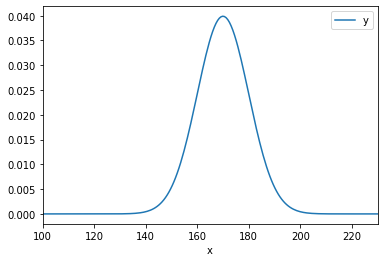

In [10]:
import pandas as pd
import matplotlib

%matplotlib inline

normplot_df = pd.DataFrame({"x" :xes, "y" : ys})
normplot_df.plot(x = "x", y = "y");